In [2]:
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from skimage import color
from skimage.measure import structural_similarity as ssim
import random

In [3]:
def findfft(imageA , imageB):
    im1 = np.fft.fft2(imageA)
    im1_fshift = np.fft.fftshift(im1)
    mag1 = 20 * np.log(np.abs(im1_fshift))
    
    im2 = np.fft.fft2(imageB)
    im2_fshift = np.fft.fftshift(im2)
    mag2 = 20 * np.log(np.abs(im2_fshift))
    
    sim = np.sqrt(np.sum((mag1-mag2)**2))
    return sim

In [4]:
samplesize = 0

In [5]:
IPimgfolder = 'C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\pgimages'
ganOPimgfolder = 'C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\pgfakes'
#IPrandomfolder1 = 'C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\nf'
#OPrandomfolder2 = 'C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\nffakes'
samplesize = 6
seedval = 700

In [7]:
#sample run
#IPimgfolder = 'C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\nffakes'

In [6]:
# sample a few images from folder
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(IPimgfolder) if isfile(join(IPimgfolder, f))]
random.seed(seedval)
if samplesize == 0:
    sampledfileslist = onlyfiles
else:
    sampledfileslist = random.sample(onlyfiles,samplesize)


In [7]:
fft_dict = {}

In [8]:
def numeric_chars(x):
    y = x[5:-4]
    return(int(y))

In [9]:
for ip in sampledfileslist:
    ippath = os.path.join(IPimgfolder,ip)
    img1 = cv2.imread(ippath,0)
    img1.resize(64,64)
    bigList = []
    file_list = os.listdir(ganOPimgfolder)
    for file in sorted(file_list, key = numeric_chars):
        imgsimList = []
        ganoppath = os.path.join(ganOPimgfolder,file)
        img2 = cv2.imread(ganoppath,0)       
        #name = file[:-4]
        imgsimList.append(file)
        s = findfft(img1,img2)
        imgsimList.append(s)
        bigList.append(imgsimList)
    fft_dict[ip] = bigList    

C:\Users\suhit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


The Key to the dictionary below is the randomly sampled 6 input images. The value to the dictionary 
is basically a list which comprises of 2 entries :
1) the GAN image 
2) the FFT difference value 

A higher value implies a higher error. So, lesser value implies higher similarity.

In general as observed , the fft difference value decreases as the images spit out by the GAN keeps on improving. 

Note : The images spit out by the GAN are of the format 'image%%%%.png'
    


In [10]:
fft_dict

{'11567.png': [['image920.png', 4511.424320522],
  ['image921.png', 4510.704108976744],
  ['image922.png', 4497.126082196565],
  ['image923.png', 4390.223838326615],
  ['image924.png', 4345.384440149676],
  ['image925.png', 4303.377037041555],
  ['image926.png', 4177.99220123753],
  ['image927.png', 4177.962234642652],
  ['image928.png', 4177.875998857606],
  ['image929.png', 4177.989979864976],
  ['image930.png', 4177.699922528157],
  ['image931.png', 4177.8029713501],
  ['image932.png', 4177.976022168956],
  ['image933.png', 4177.864281345071],
  ['image934.png', 4178.036136520744],
  ['image935.png', 4177.1057532529285],
  ['image936.png', 4177.237766187404],
  ['image937.png', 4177.512140575519],
  ['image938.png', 4177.798284567717],
  ['image939.png', 4177.473735112292],
  ['image940.png', 4177.950586346577],
  ['image941.png', 4178.020405144029],
  ['image942.png', 4178.337978224676],
  ['image943.png', 4178.032208656933],
  ['image944.png', 4177.646450313689],
  ['image945.png'

In [11]:
import pandas as pd
loc = 'C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\output_fft_dict.csv'
(pd.DataFrame.from_dict(data=fft_dict, orient='index')
   .to_csv(loc, header=False))

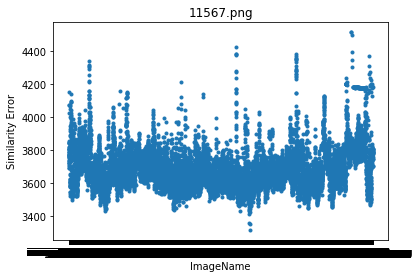

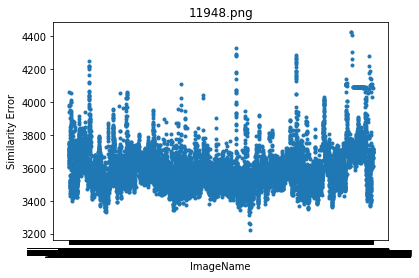

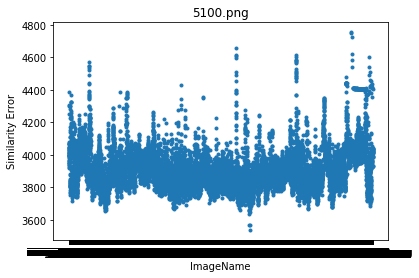

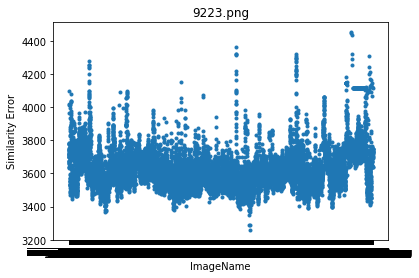

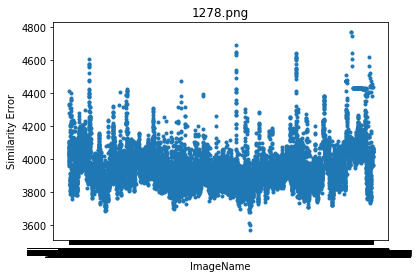

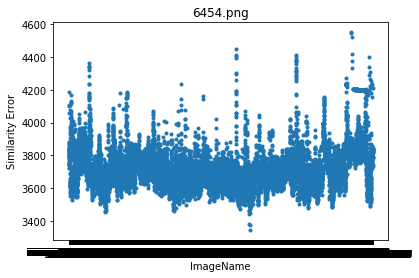

In [12]:
for k in fft_dict.keys():
    valList = fft_dict[k]
    #for val in valList:
    x_list = [item[0] for item in valList]
    y_list = [item[1] for item in valList]
    plt.title(k)
    plt.xlabel('ImageName')
    plt.ylabel('Similarity Error')
        #xn = range(len(x))
        #plt.xticks(xn,x)
        #plt.xticks(rotation=45)
        #plt.title(k)
    plt.plot(x_list,y_list,'.')       
    plt.show()